In [2]:
import pandas as pd

data = pd.read_csv('diabetes.csv')

data.head()

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.output(x))
        return x


model = DiabetesModel()
criterion = nn.BCELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [5]:
num_epochs = 50
model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


Epoch [1/50], Loss: 0.6369
Epoch [2/50], Loss: 0.6056
Epoch [3/50], Loss: 0.5496
Epoch [4/50], Loss: 0.5599
Epoch [5/50], Loss: 0.5188
Epoch [6/50], Loss: 0.4750
Epoch [7/50], Loss: 0.4891
Epoch [8/50], Loss: 0.4554
Epoch [9/50], Loss: 0.4457
Epoch [10/50], Loss: 0.4571
Epoch [11/50], Loss: 0.4525
Epoch [12/50], Loss: 0.4427
Epoch [13/50], Loss: 0.4411
Epoch [14/50], Loss: 0.4441
Epoch [15/50], Loss: 0.4365
Epoch [16/50], Loss: 0.4348
Epoch [17/50], Loss: 0.4497
Epoch [18/50], Loss: 0.4281
Epoch [19/50], Loss: 0.4505
Epoch [20/50], Loss: 0.4485
Epoch [21/50], Loss: 0.4259
Epoch [22/50], Loss: 0.4104
Epoch [23/50], Loss: 0.4332
Epoch [24/50], Loss: 0.4090
Epoch [25/50], Loss: 0.4068
Epoch [26/50], Loss: 0.4179
Epoch [27/50], Loss: 0.4016
Epoch [28/50], Loss: 0.3961
Epoch [29/50], Loss: 0.3958
Epoch [30/50], Loss: 0.3897
Epoch [31/50], Loss: 0.3907
Epoch [32/50], Loss: 0.4121
Epoch [33/50], Loss: 0.3809
Epoch [34/50], Loss: 0.4042
Epoch [35/50], Loss: 0.4046
Epoch [36/50], Loss: 0.3778
E

In [6]:
model.eval()

y_pred_list = []
y_true_list = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        y_pred_list.append(outputs)
        y_true_list.append(labels)

y_pred_list = torch.cat(y_pred_list)
y_true_list = torch.cat(y_true_list)

y_pred_binary = (y_pred_list > 0.5).float()

y_pred_np = y_pred_binary.numpy()
y_true_np = y_true_list.numpy()


Accuracy: 74.12%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.59      0.63        86
         1.0       0.77      0.83      0.80       142

    accuracy                           0.74       228
   macro avg       0.73      0.71      0.72       228
weighted avg       0.74      0.74      0.74       228



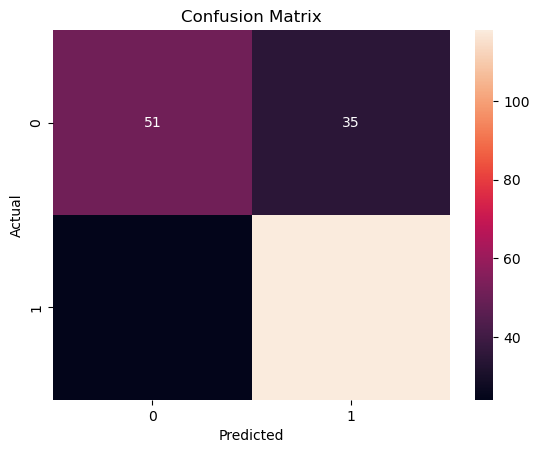

In [7]:


accuracy = accuracy_score(y_true_np, y_pred_np)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_true_np, y_pred_np))

conf_matrix = confusion_matrix(y_true_np, y_pred_np)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
#hypothesis

In [8]:
import torch.nn.functional as F

class ImprovedDiabetesModel(nn.Module):
    def __init__(self):
        super(ImprovedDiabetesModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.3)  # 30% dropout to prevent overfitting
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after each layer
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.sigmoid(self.output(x))
        return x


improved_model = ImprovedDiabetesModel()
optimizer_improved = optim.Adam(improved_model.parameters(), lr=0.001)  


num_epochs = 50
batch_size = 8  # Smaller batch size to reduce memory footprint
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


improved_model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer_improved.zero_grad()
        
        outputs = improved_model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer_improved.step()
        
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


Epoch [1/50], Loss: 0.6482
Epoch [2/50], Loss: 0.5822
Epoch [3/50], Loss: 0.5091
Epoch [4/50], Loss: 0.5048
Epoch [5/50], Loss: 0.4575
Epoch [6/50], Loss: 0.4844
Epoch [7/50], Loss: 0.4744
Epoch [8/50], Loss: 0.4617
Epoch [9/50], Loss: 0.4691
Epoch [10/50], Loss: 0.4745
Epoch [11/50], Loss: 0.4608
Epoch [12/50], Loss: 0.4434
Epoch [13/50], Loss: 0.4595
Epoch [14/50], Loss: 0.4615
Epoch [15/50], Loss: 0.4367
Epoch [16/50], Loss: 0.4474
Epoch [17/50], Loss: 0.4506
Epoch [18/50], Loss: 0.4306
Epoch [19/50], Loss: 0.4309
Epoch [20/50], Loss: 0.4217
Epoch [21/50], Loss: 0.4354
Epoch [22/50], Loss: 0.4295
Epoch [23/50], Loss: 0.4414
Epoch [24/50], Loss: 0.4237
Epoch [25/50], Loss: 0.4279
Epoch [26/50], Loss: 0.4181
Epoch [27/50], Loss: 0.4229
Epoch [28/50], Loss: 0.4172
Epoch [29/50], Loss: 0.4088
Epoch [30/50], Loss: 0.4247
Epoch [31/50], Loss: 0.4120
Epoch [32/50], Loss: 0.4362
Epoch [33/50], Loss: 0.4343
Epoch [34/50], Loss: 0.4142
Epoch [35/50], Loss: 0.4116
Epoch [36/50], Loss: 0.4094
E

In [9]:
model.eval()

y_pred_list = []
y_true_list = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        y_pred_list.append(outputs)
        y_true_list.append(labels)

y_pred_list = torch.cat(y_pred_list)
y_true_list = torch.cat(y_true_list)

y_pred_binary = (y_pred_list > 0.5).float()

y_pred_np = y_pred_binary.numpy()
y_true_np = y_true_list.numpy()


Accuracy: 74.12%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.59      0.63        86
         1.0       0.77      0.83      0.80       142

    accuracy                           0.74       228
   macro avg       0.73      0.71      0.72       228
weighted avg       0.74      0.74      0.74       228



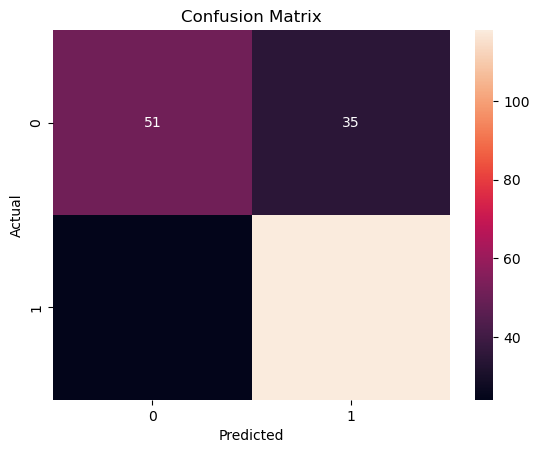

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_true_np, y_pred_np)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_true_np, y_pred_np))

conf_matrix = confusion_matrix(y_true_np, y_pred_np)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Improved Model Accuracy: 74.56%
Improved Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.70      0.67        86
         1.0       0.81      0.77      0.79       142

    accuracy                           0.75       228
   macro avg       0.73      0.74      0.73       228
weighted avg       0.75      0.75      0.75       228



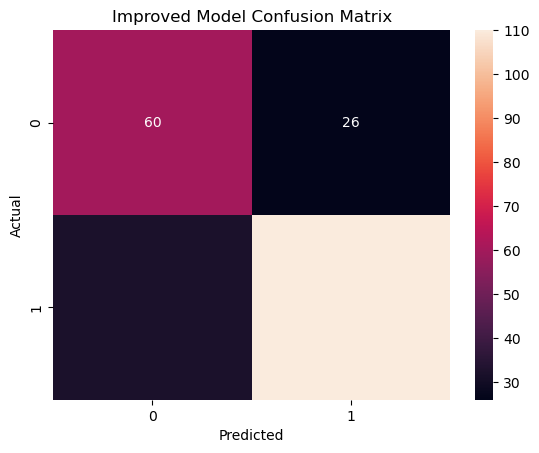

In [12]:
improved_model.eval()

y_pred_list_improved = []
y_true_list_improved = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = improved_model(inputs)
        y_pred_list_improved.append(outputs)
        y_true_list_improved.append(labels)

# Convert predictions to binary (0 or 1)
y_pred_list_improved = torch.cat(y_pred_list_improved)
y_true_list_improved = torch.cat(y_true_list_improved)

y_pred_binary_improved = (y_pred_list_improved > 0.5).float()

# Convert to numpy for further processing
y_pred_np_improved = y_pred_binary_improved.numpy()
y_true_np_improved = y_true_list_improved.numpy()

# Calculate accuracy
accuracy_improved = accuracy_score(y_true_np_improved, y_pred_np_improved)
print(f'Improved Model Accuracy: {accuracy_improved * 100:.2f}%')

# Classification report
print('Improved Model Classification Report:')
print(classification_report(y_true_np_improved, y_pred_np_improved))

# Confusion matrix
conf_matrix_improved = confusion_matrix(y_true_np_improved, y_pred_np_improved)
sns.heatmap(conf_matrix_improved, annot=True, fmt='d')
plt.title('Improved Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
